# Employee Data Analysis

In [5]:
#importing numpy, matplotlib & pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# TASK 1
employees = pd.read_excel('DS1_C4_S5_Employee_Data_Practice-Copy1.xlsx')
employees

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4
...,...,...,...,...,...,...
65,1074,Female,HR,82500,43,13
66,1075,Male,Sales,53500,28,5
67,1076,Female,HR,57000,29,6
68,1077,Male,Sales,66500,33,7


In [7]:
salary = employees.groupby('Department')['Annual Salary ($)'].sum()
salary

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

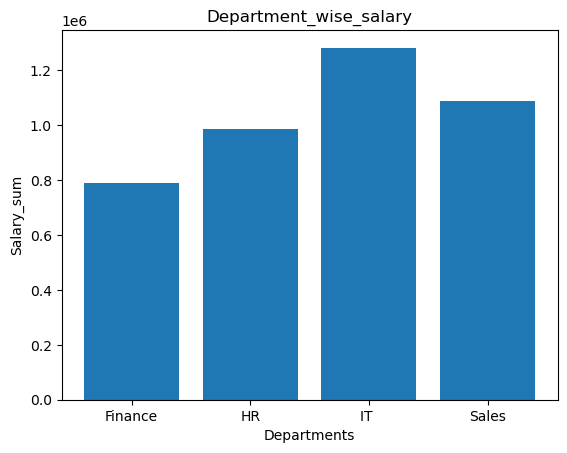

In [8]:
plt.bar(x= salary.index, height= salary.values)
plt.title('Department_wise_salary')
plt.xlabel("Departments")
plt.ylabel("Salary_sum")
plt.show()

In [9]:
# TASK 2
df = pd.crosstab(employees.Department, employees.Gender, rownames=['Deprtment'],colnames=['Gender'])
df

Gender,Female,Male
Deprtment,,
Finance,2,11
HR,11,4
IT,10,12
Sales,4,16


In [10]:
equality = pd.DataFrame({'Department': df.index,
                        'Female': df.Female,
                        'Male': df.Male})
equality

,Department,Female,Male
Deprtment,,,
Finance,Finance,2,11
HR,HR,11,4
IT,IT,10,12
Sales,Sales,4,16


In [11]:
equality1 = pd.DataFrame(df.to_records())
equality1

,Deprtment,Female,Male
0,Finance,2,11
1,HR,11,4
2,IT,10,12
3,Sales,4,16


In [12]:
# TASK 3
employees.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


In [13]:


# Step 1
# Define the filter for IT department and zero work experience
filter1 = (employees['Department'] == 'IT') & (employees['Work_Experience'] == 0)

# Step 2
#  Apply the filter and get the subset of employees
filtered_employees = employees[filter1]

# Step 3
#  Compute the mean salary of the filtered employees
mean_salary = filtered_employees['Annual Salary ($)'].mean()

# Step 4
# Print the result
print(f"The estimated salary for a new IT employee with no work experience is: ${mean_salary:.2f}")


The estimated salary for a new IT employee with no work experience is: $nan


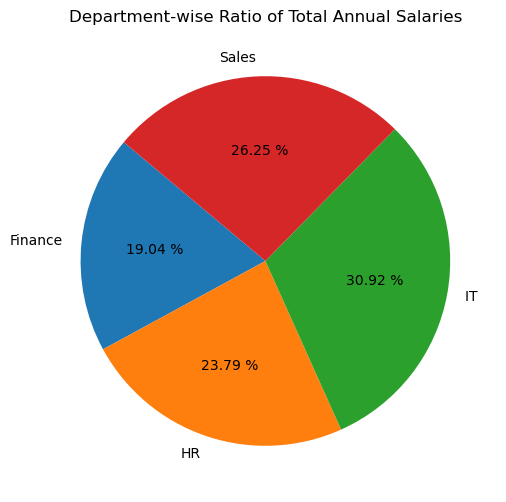

In [14]:

# TASK 4 Summarize the data by department
salary_by_department = employees.groupby('Department')['Annual Salary ($)'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(salary_by_department, labels=salary_by_department.index, autopct='%.2f %%', startangle=140)
plt.title('Department-wise Ratio of Total Annual Salaries')
plt.show()


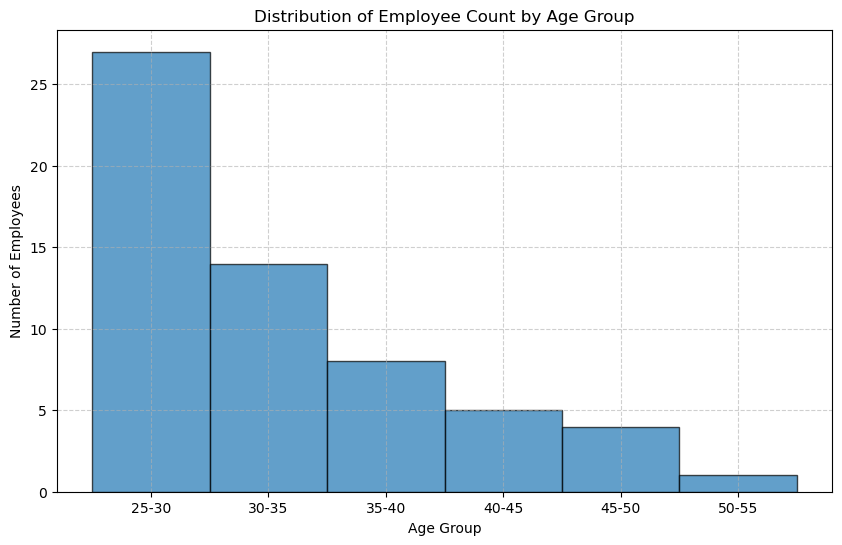

In [15]:
# TASK 5 Define age bins
bins = [25, 30, 35, 40, 45, 50, 55]  # Added an extra bin edge for proper histogram

# Create a histogram of age distribution
plt.figure(figsize=(10, 6))
plt.hist(employees['Age'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Count by Age Group')

# Set the tick labels for the age groups
bin_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]
plt.xticks(ticks=[(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)], labels=bin_labels)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [16]:
# TASK 6 employees Head
employees.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


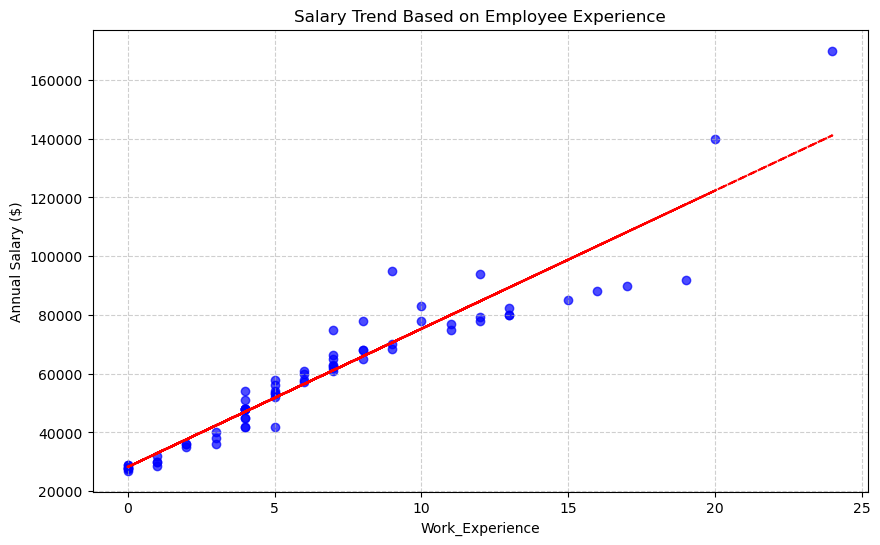

In [17]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(employees['Work_Experience'], employees['Annual Salary ($)'], color='blue', alpha=0.7)
plt.xlabel('Work_Experience')
plt.ylabel('Annual Salary ($)')
plt.title('Salary Trend Based on Employee Experience')
plt.grid(True, linestyle='--', alpha=0.6)

# Optionally, add a trend line
import numpy as np
m, b = np.polyfit(employees['Work_Experience'], employees['Annual Salary ($)'], 1)
plt.plot(employees['Work_Experience'], m*employees['Work_Experience'] + b, color='red', linestyle='--')

plt.show()

<Figure size 1200x800 with 0 Axes>

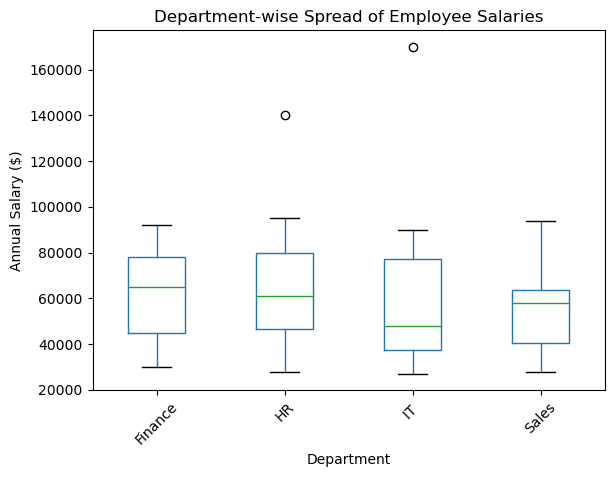

Departments with outliers:
HR
IT 


In [18]:
#  TASK 7 Create a box plot for each department
plt.figure(figsize=(12, 8))
employees.boxplot(column='Annual Salary ($)', by='Department', grid=False)
plt.title('Department-wise Spread of Employee Salaries')
plt.suptitle('')  # Remove the default title to keep only the plot title
plt.xlabel('Department')
plt.ylabel('Annual Salary ($)')
plt.xticks(rotation=45)
plt.show()

# Identify departments with outliers & Calculate IQR and detect outliers
def detect_outliers(df, column, group_by):
    outliers = {}
    grouped = df.groupby(group_by)[column]
    for name, group in grouped:
        q1 = group.quantile(0.25)
        q3 = group.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Check if there are any values outside the bounds
        if any(group < lower_bound) or any(group > upper_bound):
            outliers[name] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    return outliers

outliers = detect_outliers(employees, 'Annual Salary ($)', 'Department')

print("Departments with outliers:")
for department in outliers:
    print(department)
